Fitting with user-defined functions
===

There are numerous ways to express functions in ROOT (https://root.cern.ch/doc/master/classTF1.html) in this example we'll explore a general method of defining fit functions.  Again we will use the ROOT fitting framework for the next couple of exercies to illustrate some general featues of the non-linear fitting problems.  Some of the examples we see may be replicated in scipy.optimize, but not neceassarily all of them.

ROOT classes used here:
* [TF1](https://root.cern.ch/doc/master/classTF1.html): 1D function
* [TH1F](https://root.cern.ch/doc/master/classTH1.html): 1D histogram (the content of each bin is described by a float)

In [2]:
import ROOT as r
%jsroot off

In module 'Darwin':
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/libkern/arm/OSByteOrder.h:14:1: error: '_OSSwapInt16' has different definitions in different modules; definition in module 'Darwin.libkern.OSByteOrder' first difference is return type is 'uint16_t' (aka 'unsigned short')
uint16_t
^~~~~~~~
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/libkern/arm/_OSByteOrder.h:49:1: note: but in 'DarwinFoundation.OSByteOrder' found different return type '__uint16_t' (aka 'unsigned short')
__uint16_t
^~~~~~~~~~
In module 'Darwin':
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/libkern/arm/OSByteOrder.h:24:1: error: '_OSSwapInt32' has different definitions in different modules; definition in module 'Darwin.libkern.OSByteOrder' first difference is return type is 'uint32_t' (aka 'unsigned int')
uint32_t
^~~~~~~~
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/libkern/arm/_OSByteOrder.h:59:1: note: but in 'DarwinFoundation.O

Welcome to JupyROOT 6.28/04


First we define a function and store it in a TF1 object.  In this example we will use Pythonic interfaces, next time we'll see how the same patterns can be used in C++.

In [4]:
from math import pow, exp

# A function producing two peaks on top of an exponentialy 
# falling background.  Depends on several parameters.
# Generic interface for fcn of n input-values and m parameters
# Functions with this interface may be used to construct a "TFunction" or TF1
# vx is the independent value(s): array like
# p is the parameter value(s): array like

def myfunction(vx, par):
    x=vx[0]
    # background model
    bkgScale=par[0]
    alpha=par[1]
    beta=par[2]
    background = pow(x/beta,-1.0*alpha) #(x/beta)^-alpha
    # first peak, Gaussian model
    A1=par[3]
    mu1=par[4]
    sig1=par[5]
    peak1=A1*exp(-0.5*(x-mu1)*(x-mu1)/sig1/sig1) #A*exp((x-mu)^2/2sigma^2)
    # second peak, Gaussian model
    A2=par[6]
    mu2=par[7]
    sig2=par[8]
    peak2=A2*exp(-0.5*(x-mu2)*(x-mu2)/sig2/sig2)
    return bkgScale*background+peak1+peak2 

xrange=(300,1000)
f1 = r.TF1("f1",myfunction,xrange[0],xrange[1],9)  # xrange 300<=x<=1000, there are 9 parameters in this function
f1.SetNpx(500)  # use large number of points in drawing function to resolve small details better
f1.SetParameters(1e9,4.7,40,5000,490,2,1200,800,25)  # define the parameters
f1.SetParNames("BkgScale","alpha","beta","A1","mu1","sig1","A2","mu2","sig2")  # optional, but nice

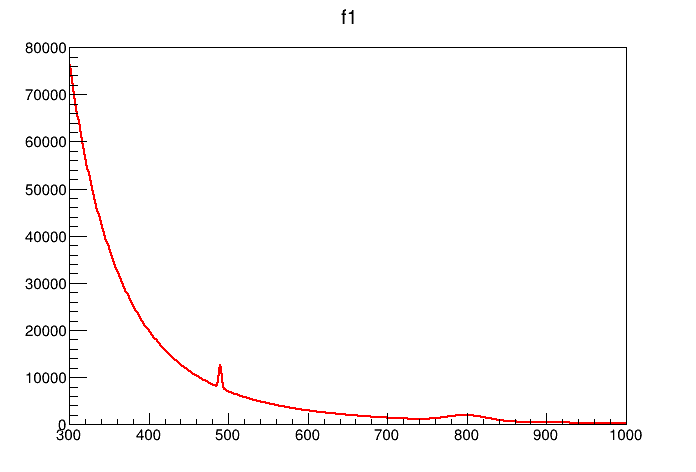

In [5]:
tc=r.TCanvas()
f1.Draw()
tc.Draw()

Generate random data according to this distribution

In [6]:
entries=100000
ranHist1 = r.TH1F("ranHist1", "Random Histogram for my PDF;x;entries",500,xrange[0],xrange[1]);
ranHist1.FillRandom("f1",entries)

cling::DynamicLibraryManager::loadLibrary(): dlopen(/Users/akrape/miniconda3/envs/dmnu/lib/libMathMore.6.28.04.so, 0x0009): Library not loaded: @rpath/libgfortran.5.dylib
  Referenced from: <342C6FCD-A261-33D7-B978-626161CFD49B> /Users/akrape/miniconda3/envs/dmnu/lib/libopenblas.0.dylib
  Reason: tried: '/Users/akrape/miniconda3/envs/dmnu/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/akrape/miniconda3/envs/dmnu/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/akrape/miniconda3/envs/dmnu/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/akrape/miniconda3/envs/dmnu/lib/../lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/akrape/miniconda3/envs/dmnu/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/akrape/miniconda3/envs/dmnu/lib/../lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/akrape/miniconda3/envs/dmnu/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_pat

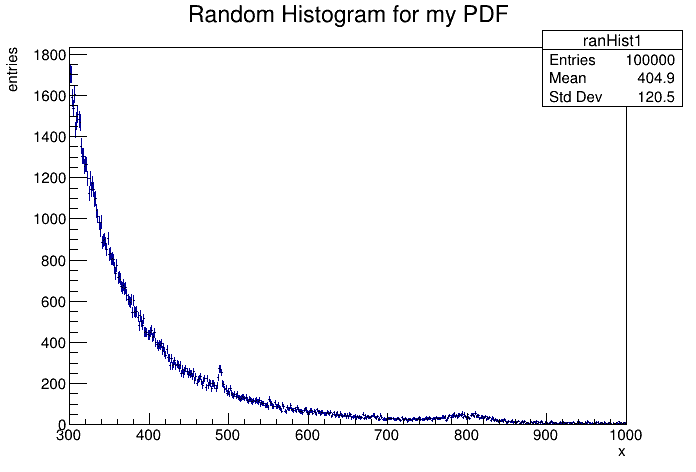

In [5]:
ranHist1.Draw("e")
tc.Draw()

 Now "pretend" that we don't know the paramaters used to generate the data.
 
 All fits begin with initial guesses at the best parameter values

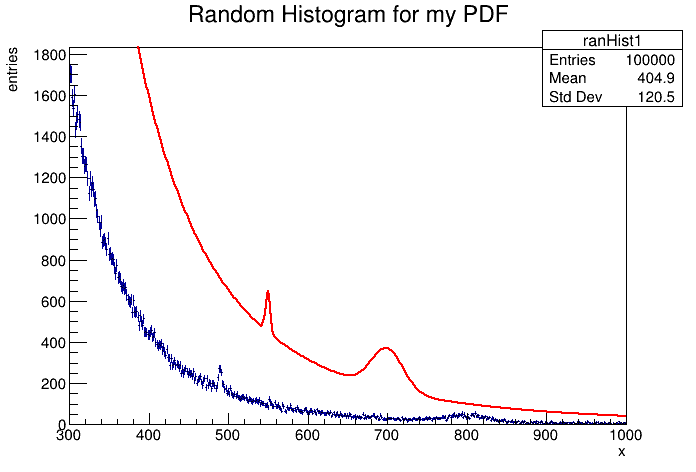

In [6]:
f1.SetParameters(1e6,4,80,200,550,3,200,700,20)
ranHist1.Draw("e")
f1.Draw("same")
tc.Draw()

To get better qualitative agreement try:

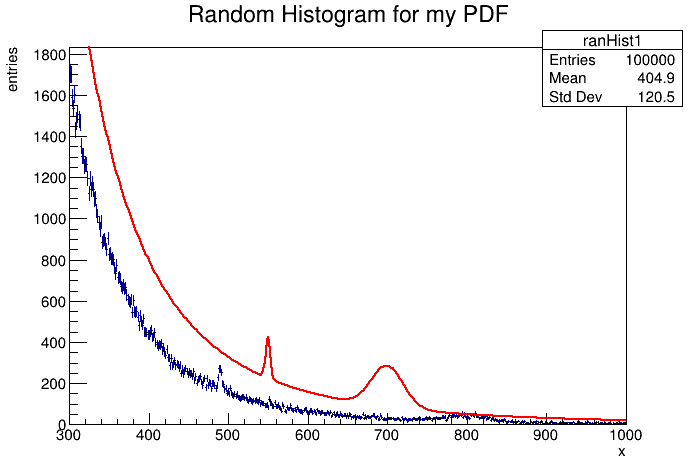

In [7]:
f1.SetParameters(0.5e6,4,80,200,550,3,200,700,20)
ranHist1.Draw("e")
f1.Draw("same")
tc.Draw()

Try to fit the function to the data:

In [7]:
result=ranHist1.Fit(f1,"E")
f1=ranHist1.GetFunction("f1")

 FCN=478.213 FROM MINOS     STATUS=SUCCESSFUL    157 CALLS        6596 TOTAL
                     EDM=3.53573e-07    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  BkgScale     4.30678e+07   1.86192e+06   7.82414e+02  -1.77494e-09
   2  alpha        4.76525e+00   1.18557e-02   1.76807e-05   1.82370e-01
   3  beta         3.58883e+01   3.26625e-01   1.65013e-04  -1.01009e-02
   4  A1           1.06696e+02   1.19137e+01   4.06388e-04  -2.54363e-06
   5  mu1          4.89601e+02   2.76728e-01   6.83227e-06   3.15052e-06
   6  sig1        -2.39679e+00   3.01822e-01  -3.93831e-05   1.70389e-04
   7  A2           2.80002e+01   1.33386e+00  -3.37579e-03   1.29915e-04
   8  mu2          7.99259e+02   1.28158e+00  -1.69376e-03  -1.56997e-04
   9  sig2         2.54500e+01   1.14521e+00   1.14521e+00   8.40478e-05


Notice that there is a problem here. <br>
Look at the result:

chi^2: 478.21302241401645, nDOF: 491, p-value: 0.6518511761415252


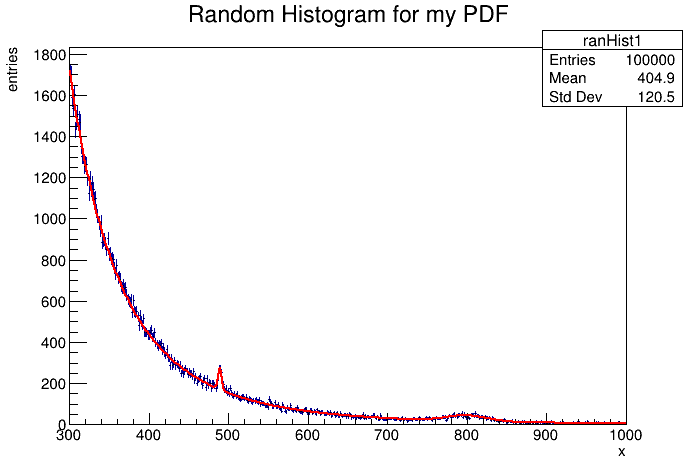

In [8]:
print(f'chi^2: {f1.GetChisquare()}, nDOF: {f1.GetNDF()}, p-value: {f1.GetProb()}')
ranHist1.Draw("e")
f1.Draw("same")
tc.Draw()

Did the fit work? Did it find both peaks? Probably not. In general, you can't count on complex fits to converge without carefully adjusting the starting parameters. Sure, in this example, you could peek at the parameters used to generate the data, but that's not an option in the real world. Go through the process of adjusting the parameters and replotting the function to get a better representation of the data. Then try a fit and see if you can extract the parameters describing the peeks.

In [9]:
# extract the parameters and their (parabolic) errors
popt = []
perr = []
for i in range(f1.GetNpar()):
    popt.append(f1.GetParameter(i))
    perr.append(f1.GetParError(i))
    print(f'f1.GetParName(i): {popt[i]:10.2f} +- {perr[i]:10.2f}')

f1.GetParName(i): 43067766.36 +- 1861916.25
f1.GetParName(i):       4.77 +-       0.01
f1.GetParName(i):      35.89 +-       0.33
f1.GetParName(i):     106.70 +-      11.91
f1.GetParName(i):     489.60 +-       0.28
f1.GetParName(i):      -2.40 +-       0.30
f1.GetParName(i):      28.00 +-       1.33
f1.GetParName(i):     799.26 +-       1.28
f1.GetParName(i):      25.45 +-       1.15


For you to try
===
In the file datadist.root you will find a histogram representing data from an unknown distribution.

* Develop your own fitting function/model and see how well you can fit this distribution. 
* You may need to try a variety of functions.
* Include a plot of your best fit at the bottom of this notebook.
* Include your p-value for the best fit and describe how you settled on this fit versus others.
* Show your best fit parameters and their errors
* Plot the fit residuals, eg for each bin plot (fit-data)/data_uncertianty.  For a good fit the points should randomy fluctuate around 0 (eg no large, contiguous regions above or below 0)
* Plot the pull distribution (for a good fit this should be consisten with a normal distribution w/ $\mu=0,\sigma=1$

For this notebook it is assumed that you'll work with ROOT.

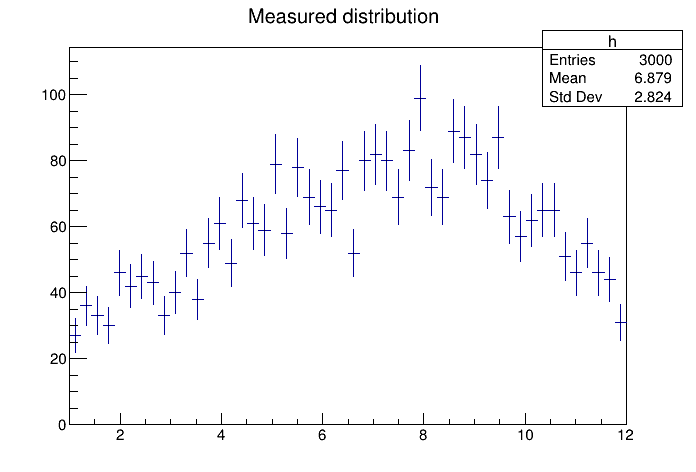

In [3]:
tf=r.TFile("datadist.root")
hist=tf.Get("h")
tc=r.TCanvas()
hist.Draw()
tc.Draw()

Chi2 = 45.582
NDF  = 38
Chi2/NDF = 1.200
p-value = 0.1859

Fit parameters:
  p[0] = 35.4209 ± 8.4804
  p[1] = 1.9287 ± 0.5280
  p[2] = 1.0820 ± 0.5757
  p[3] = 45.5945 ± 29.2341
  p[4] = 4.6763 ± 0.4111
  p[5] = 1.1621 ± 0.6467
  p[6] = 82.5730 ± 3.6346
  p[7] = 8.4037 ± 0.3934
  p[8] = 2.1055 ± 0.8598
  p[9] = 17.0700 ± 19.9027
  p[10] = 11.3736 ± 0.2161
  p[11] = 0.6535 ± 0.4581


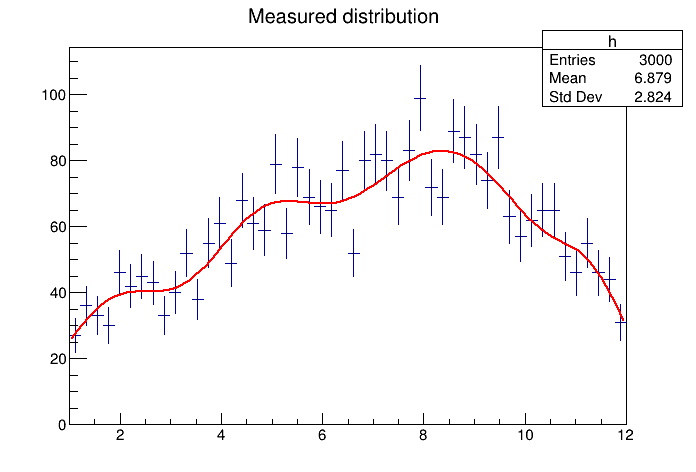

In [33]:
'''
First attempt. Histogram looks like it has 4 bumps at x=2.2, 5.8, 8, and 10.3 so I tried fitting four gaussians
Resulting pvalue is 0.1859 so I feel like I could do a bit better. Next cell is attempt number 2.
'''

f4gaus = r.TF1("f4gaus", "gaus(0) + gaus(3) + gaus(6) + gaus(9)", 0, 12)

params = [
    50, 2.1, 0.5,
    80, 5.8, 0.6,
    100, 8.0, 0.7,
    70, 10.3, 0.6
]

for i, val in enumerate(params):
    f4gaus.SetParameter(i, val)

# Fit quietly within range
fit_result = hist.Fit(f4gaus, "QR")

# Extract chi2, ndf, p-value
chi2 = f4gaus.GetChisquare()
ndf = f4gaus.GetNDF()
pval = r.TMath.Prob(chi2, ndf)

print(f"Chi2 = {chi2:.3f}")
print(f"NDF  = {ndf}")
print(f"Chi2/NDF = {chi2/ndf:.3f}")
print(f"p-value = {pval:.4f}\n")

print("Fit parameters:")
for i in range(f4gaus.GetNpar()):
    par = f4gaus.GetParameter(i)
    err = f4gaus.GetParError(i)
    print(f"  p[{i}] = {par:.4f} ± {err:.4f}")

tc1=r.TCanvas()
hist.Draw("e")
f4gaus.Draw("same")
tc1.Draw()

Chi2 = 47.349
NDF  = 41
Chi2/NDF = 1.155
p-value = 0.2295

Fit parameters:
  p[0] = 32.2967 ± 4.8322
  p[1] = 1.9672 ± 0.3014
  p[2] = 1.1350 ± 0.5359
  p[3] = 27.5273 ± 11.4885
  p[4] = 4.6210 ± 0.4214
  p[5] = 0.9204 ± 0.3243
  p[6] = 80.6283 ± 2.6095
  p[7] = 8.2965 ± 0.2501
  p[8] = 2.8118 ± 0.2934


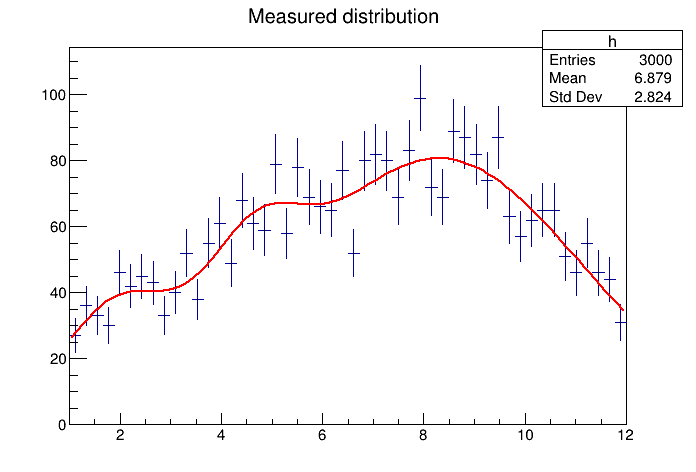

In [38]:
'''
Now I tried fitting just three gaussians and seeing if that was better. That fourth peak could be just some fluctuation so I dropped it
pvalue is now 0.2295 so that seems to be better fit. The reduced chi2 is 1.155 which is pretty close to 1. There's no glaring reason why this fit could be wrong
'''
import math
f3g = r.TF1("f3g", "gaus(0) + gaus(3) + gaus(6)", 0, 12)

# Initial parameter guesses: amplitude, mean, sigma for each Gaussian
f3g.SetParameters(60, 2.1, 0.4,    # first peak
                  80, 5.8, 0.5,    # second peak
                  100, 8.0, 0.9)   # third peak

# Perform the fit quietly ("Q") and within range ("R")
fit_result = hist.Fit(f3g, "QR")

# Extract chi2, ndf, and p-value
chi2 = f3g.GetChisquare()
ndf = f3g.GetNDF()
pval = r.TMath.Prob(chi2, ndf)

print(f"Chi2 = {chi2:.3f}")
print(f"NDF  = {ndf}")
print(f"Chi2/NDF = {chi2/ndf:.3f}")
print(f"p-value = {pval:.4f}")

print("\nFit parameters:")
for i in range(f3g.GetNpar()):
    par = f3g.GetParameter(i)
    err = f3g.GetParError(i)
    print(f"  p[{i}] = {par:.4f} ± {err:.4f}")

tc2=r.TCanvas()
hist.Draw("e")
f3g.Draw("same")
tc2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_resid


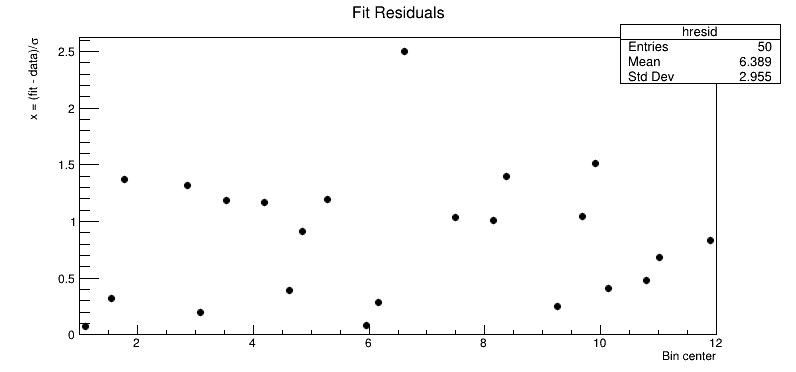

In [ ]:
'''
My residuals are all positive but show no discernable pattern outside of that. Since res = fit - data / err then that indicates that my fit is larger than my
data for all bin contents. This doesn't make sense when you look at how my curve looks below a lot of the bins in the fitting. I don't know what to do about this
'''

# --- Residuals ---
hresid = hist.Clone("hresid")
hresid.SetTitle("Fit Residuals;Bin center;x = (fit - data)/#sigma")
hresid.Reset()

for i in range(1, hist.GetNbinsX() + 1):
    x = hist.GetBinCenter(i)
    data = hist.GetBinContent(i)

    # Skip empty bins to avoid artificial positive residuals
    if data == 0:
        continue

    fit = f3g.Eval(x)

    # Poisson error for the bin
    err = math.sqrt(data)

    residual = (fit - data) / err
    hresid.SetBinContent(i, residual)
    hresid.SetBinError(i, 0)

# Draw residuals
c_resid = r.TCanvas("c_resid", "Residuals", 800, 400)
hresid.SetMarkerStyle(20)
hresid.SetMarkerSize(0.8)
hresid.Draw("P")
c_resid.Draw()

Pull distribution fit: mu = -0.244, sigma = 1.371


Warning in <TFile::Append>: Replacing existing TH1: hpull (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_pull


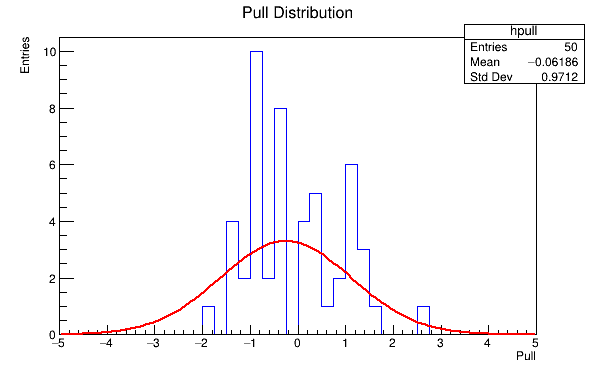

In [37]:
hpull = r.TH1F("hpull", "Pull Distribution;Pull;Entries", 40, -5, 5)
for i in range(1, hresid.GetNbinsX() + 1):
    val = hresid.GetBinContent(i)
    # Fill only finite residuals
    if math.isfinite(val) and val != 0:
        hpull.Fill(val)

# Fit pull distribution with Gaussian
pull_fit = r.TF1("pull_fit", "gaus", -5, 5)
hpull.Fit(pull_fit, "Q")  # Quiet fit

# Draw pull histogram
c_pull = r.TCanvas("c_pull", "Pull Histogram", 600, 400)
hpull.SetLineColor(r.kBlue)
hpull.Draw()
pull_fit.SetLineColor(r.kRed)
pull_fit.SetLineWidth(2)
pull_fit.Draw("same")
c_pull.Draw()

# Print pull fit parameters
mu = pull_fit.GetParameter(1)
sigma = pull_fit.GetParameter(2)
print(f"Pull distribution fit: mu = {mu:.3f}, sigma = {sigma:.3f}")

In [19]:
total_data = hist.Integral()
total_fit = sum(f3g.Eval(hist.GetBinCenter(i)) * hist.GetBinWidth(i) 
                for i in range(1, hist.GetNbinsX()+1))
print("Data integral:", total_data, "Fit integral:", total_fit)

Data integral: 3000.0 Fit integral: 649.5828008286373
